## Netflix Analysis

in this project we are going to analyse the netfilx data

## About the dataset

In this dataset we have 100 years of data with diff columns like type,title,director,rating etc 

## Library Requirements

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime

## Loading the data

In [2]:
df=pd.read_csv('./netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Preprocessing the data

In [3]:
df.shape

(8807, 12)

#### Datatype of All Columns

In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

#### Null Value of All Columns

In [5]:
pd.isnull(df).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df.size

105684

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.duplicated().sum()

0

##### To Serch Particular title is available in this dataset or not so use isin() function

In [10]:
df[df['title'].isin(['Kota Factory'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Only India

In [11]:
df[df['country']=='India']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
50,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup..."
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,"September 15, 2021",2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...
...,...,...,...,...,...,...,...,...,...,...,...,...
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,"January 1, 2018",2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
8775,s8776,TV Show,Yeh Meri Family,NaN,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,"August 31, 2018",2018,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal..."
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...


##### Aishwarya Rai Bachchan movie or tv shows

In [12]:
new_df=df.fillna("abc")
new_df[new_df['cast'].str.contains('Aishwarya Rai Bachchan')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
2544,s2545,Movie,Action Replayy,Vipul Amrutlal Shah,"Akshay Kumar, Aishwarya Rai Bachchan, Om Puri,...",India,"May 11, 2020",2010,TV-PG,129 min,"Children & Family Movies, Comedies, Internatio...","Sick of his parents’ constant squabbling, a yo..."
3917,s3918,Movie,Shabd,Leena Yadav,"Sanjay Dutt, Aishwarya Rai Bachchan, Zayed Kha...",India,"April 15, 2019",2005,TV-14,146 min,"Dramas, International Movies, Romantic Movies",When a novelist seeks inspiration by urging hi...
4573,s4574,Movie,Jodhaa Akbar,Ashutosh Gowariker,"Hrithik Roshan, Aishwarya Rai Bachchan, Sonu S...",India,"October 1, 2018",2008,TV-14,214 min,"Action & Adventure, Dramas, International Movies","In 16th-century India, what begins as a strate..."
4724,s4725,Movie,Guzaarish,Sanjay Leela Bhansali,"Hrithik Roshan, Aishwarya Rai Bachchan, Sherna...",India,"August 2, 2018",2010,TV-14,121 min,"Dramas, International Movies",After an onstage disaster leaves an illusionis...
5008,s5009,Movie,Guru,Mani Ratnam,"Abhishek Bachchan, Mithun Chakraborty, Aishwar...",India,"March 1, 2018",2007,TV-PG,155 min,"Dramas, International Movies",Ambitious Gurukant Desai ignores his father's ...
6912,s6913,Movie,Hamara Dil Aapke Paas Hai,Satish Kaushik,"Anil Kapoor, Aishwarya Rai Bachchan, Sonali Be...",India,"March 1, 2018",2000,TV-14,158 min,"Dramas, International Movies, Music & Musicals",Love blooms when kind-hearted Avinash takes in...
7249,s7250,Movie,Kyun! Ho Gaya Na,Samir Karnik,"Aishwarya Rai Bachchan, Vivek Oberoi, Amitabh ...",India,"March 1, 2018",2004,TV-PG,165 min,"International Movies, Romantic Movies",Cinematic lovebirds Aishwarya Rai and Vivek Ob...
8144,s8145,Movie,Taal,Subhash Ghai,"Anil Kapoor, Aishwarya Rai Bachchan, Akshaye K...",India,"March 1, 2018",1999,TV-PG,177 min,"Dramas, International Movies, Music & Musicals",Businessman Manav falls for aspiring singer Ma...


#### For Perticular TV_Shows How Many Seasons Are Available

In [13]:
new_df=df.fillna("abc")
new_df[new_df['title'].str.contains('Age of')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1272,s1273,TV Show,Age of Samurai: Battle for Japan,abc,"Masayoshi Haneda, Masami Kosaka, Hideaki Ito, ...",United States,"February 24, 2021",2021,TV-MA,1 Season,"Docuseries, International TV Shows",Dynamic reenactments and expert commentaries b...
1864,s1865,TV Show,Kipo and the Age of Wonderbeasts,abc,"Karen Fukuhara, Sydney Mikayla, Deon Cole, Coy...",United States,"October 12, 2020",2020,TV-Y7,3 Seasons,"Kids' TV, TV Comedies",Making her way through a world of mutant anima...
3517,s3518,Movie,The Crystal Calls Making the Dark Crystal: Age...,Randall Lobb,"Taron Egerton, Natalie Dormer, Simon Pegg, Jas...",United States,"September 14, 2019",2019,TV-PG,83 min,"Documentaries, International Movies","Go behind the scenes with stars, puppeteers an..."
3551,s3552,TV Show,The Dark Crystal: Age of Resistance,abc,"Taron Egerton, Nathalie Emmanuel, Anya Taylor-...","United Kingdom, United States","August 30, 2019",2019,TV-PG,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",As power-hungry overlords drain life from the ...
4156,s4157,Movie,Alt-Right: Age of Rage,Adam Bhala Lough,"Daryle Lamont Jenkins, Richard Spencer",abc,"January 28, 2019",2018,TV-MA,106 min,Documentaries,This documentary follows a white power leader ...
4400,s4401,TV Show,Age of Tanks,abc,abc,"Germany, France, Russia","November 10, 2018",2017,TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...",The history of military tanks unfolds in a doc...
4664,s4665,TV Show,Age of Rebellion,Peter Ho,"Peter Ho, Jeanine Yang, Tammy Chen, Jason Tsou...",Taiwan,"September 1, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","At their high school, a group of unruly teens ..."
6101,s6102,TV Show,Age of Glory,abc,"Debbie Goh, Aenie Wong, Frederick Lee, Leslie ...",abc,"August 14, 2017",2010,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Amid the thriving nightlife of 1960s Kuala Lum...
8186,s8187,Movie,The Age of Shadows,Jee-woon Kim,"Kang-ho Song, Gong Yoo, Ji-min Han, Tae-goo Eo...",South Korea,"January 1, 2018",2016,TV-MA,140 min,"Action & Adventure, Dramas, International Movies","Formerly a Korean resistance fighter, a police..."


#### Particular Intersted Movie Or TvShows

In [14]:
new_df[new_df['listed_in'].str.contains('Action')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",abc,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",abc,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
19,s20,TV Show,Jaguar,abc,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",abc,"September 22, 2021",2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro..."
21,s22,TV Show,Resurrection: Ertugrul,abc,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...
36,s37,Movie,The Stronghold,Cédric Jimenez,"Gilles Lellouche, Karim Leklou, François Civil...",abc,"September 17, 2021",2021,TV-MA,105 min,"Action & Adventure, Dramas, International Movies","Tired of the small-time grind, three Marseille..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8766,s8767,Movie,XXx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,"January 1, 2019",2002,PG-13,124 min,"Action & Adventure, Sports Movies",A notorious underground rush-seeker deemed unt...
8767,s8768,Movie,XXX: State of the Union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,"January 1, 2019",2005,PG-13,101 min,Action & Adventure,"In this action-packed follow-up to XXX, U.S. i..."
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,"May 1, 2017",2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ..."
8790,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",2008,UR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...


#### Unique Rating

In [15]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

#### Count of Unique Rating

In [16]:
df['rating'].nunique()

17

#### how many movie has pg rating and it is from india

In [17]:
df[(df['rating']=='PG') & (df['country']=='India') & (df['type']=="Movie")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1022,s1023,Movie,Taare Zameen Par,Aamir Khan,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...",India,"April 17, 2021",2007,PG,162 min,"Dramas, International Movies",When daydreamer Ishaan is sent to boarding sch...
4466,s4467,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",2011,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp..."


##### Convert Year Columns datatype to datetime

In [18]:
df['release_year']=pd.to_datetime(df['release_year'], format='%Y')

In [19]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year    datetime64[ns]
rating                  object
duration                object
listed_in               object
description             object
dtype: object

#### Create New Column 

In [20]:
df['year']=df['release_year'].dt.year

#### show all tvshows or movies with specific year

In [21]:
df[(df['type']=='Movie') & (df['year']==2018)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018-01-01,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,2018
94,s95,Movie,Show Dogs,Raja Gosnell,"Will Arnett, Ludacris, Natasha Lyonne, Stanley...","United Kingdom, United States","September 8, 2021",2018-01-01,PG,90 min,"Children & Family Movies, Comedies",A rough and tough police dog must go undercove...,2018
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018-01-01,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do...",2018
107,s108,Movie,A Champion Heart,David de Vos,"Mandy Grace, David de Vos, Donna Rusch, Devan ...",United States,"September 4, 2021",2018-01-01,G,90 min,"Children & Family Movies, Dramas",When a grieving teen must work off her debt to...,2018
157,s158,Movie,Level 16,Danishka Esterhazy,"Katie Douglas, Celina Martin, Peter Outerbridg...",Canada,"September 1, 2021",2018-01-01,TV-14,102 min,"Sci-Fi & Fantasy, Thrillers",In a bleak academy that teaches girls the virt...,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8706,s8707,Movie,We the Animals,Jeremiah Zagar,"Evan Rosado, Josiah Gabriel, Isaiah Kristian, ...",United States,"February 11, 2019",2018-01-01,R,93 min,"Dramas, Independent Movies",A trio of brothers cope with their parents' vo...,2018
8724,s8725,Movie,What Still Remains,Josh Mendoza,"Lulu Antariksa, Colin O'Donoghue, Mimi Rogers,...",United States,"December 21, 2018",2018-01-01,TV-14,91 min,"Dramas, Thrillers","Struggling to survive alone post-apocalypse, a...",2018
8732,s8733,Movie,White Chamber,Paul Raschid,"Shauna MacDonald, Oded Fehr, Amrita Acharia, S...",United Kingdom,"August 1, 2019",2018-01-01,TV-MA,89 min,"Sci-Fi & Fantasy, Thrillers","When a civil war ravages the UK, a scientist a...",2018
8743,s8744,Movie,Wildlife,Paul Dano,"Carey Mulligan, Ed Oxenbould, Bill Camp, Jake ...",United States,"September 1, 2020",2018-01-01,PG-13,105 min,"Dramas, Independent Movies",A teen’s life in 1960 Montana grows complicate...,2018


#### G rating tv_shows in year 2018

In [22]:
df[(df['rating']=='G') & (df['year']==2018) & (df['type']=='Movie')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
107,s108,Movie,A Champion Heart,David de Vos,"Mandy Grace, David de Vos, Donna Rusch, Devan ...",United States,"September 4, 2021",2018-01-01,G,90 min,"Children & Family Movies, Dramas",When a grieving teen must work off her debt to...,2018
4873,s4874,Movie,Pup Star: World Tour,Robert Vince,"Jed Ress, Makenzie Moss, Denisse Ojeda, Reggie...","Canada, Japan, United States","May 5, 2018",2018-01-01,G,87 min,"Children & Family Movies, Comedies, Music & Mu...",Talented pooches from around the world compete...,2018


##### latest Movie or tvshow

In [23]:
df.sort_values(by='year',ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021-01-01,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",2021
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,"June 2, 2021",2021-01-01,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...,2021
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021-01-01,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...,2021
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021-01-01,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...,2021
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,"June 4, 2021",2021-01-01,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn...",2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943-01-01,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,1943
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943-01-01,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,1943
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942-01-01,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,1942
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942-01-01,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,1942


#### How many Movies are listed in the "International Movies" category?

In [24]:
df[df['listed_in'].str.contains('International Movies')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993-01-01,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1993
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021-01-01,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020-01-01,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,2020
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996-01-01,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,1996
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998-01-01,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016-01-01,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...,2016
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014-01-01,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,2014
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009-01-01,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2009
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015-01-01,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2015


## Visulization Of Data

##### in which year highest number of movies or tv_shows was released

In [25]:
df['release_year'].dt.year.value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

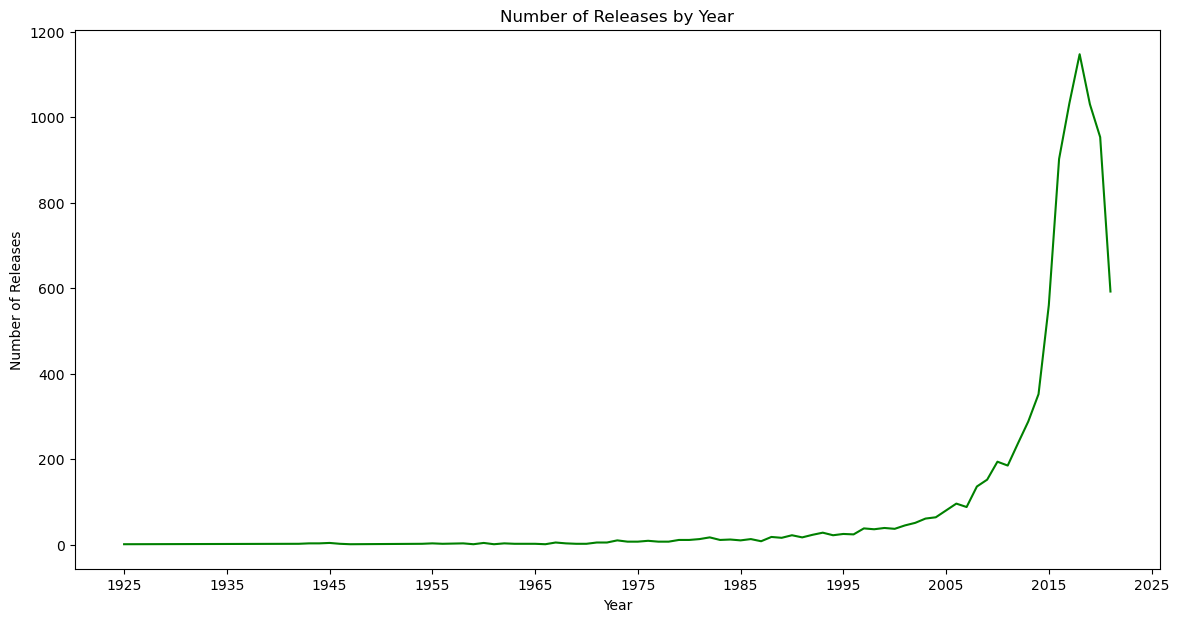

In [26]:
grouped_data=df.groupby('year')['year'].count()
plt.figure(figsize=(14,7))
plt.plot(grouped_data.index,grouped_data.values,c='green')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Number of Releases by Year')
plt.xticks(range(min(grouped_data.index), max(grouped_data.index)+5, 10))
plt.show()

#### Top 10 Years

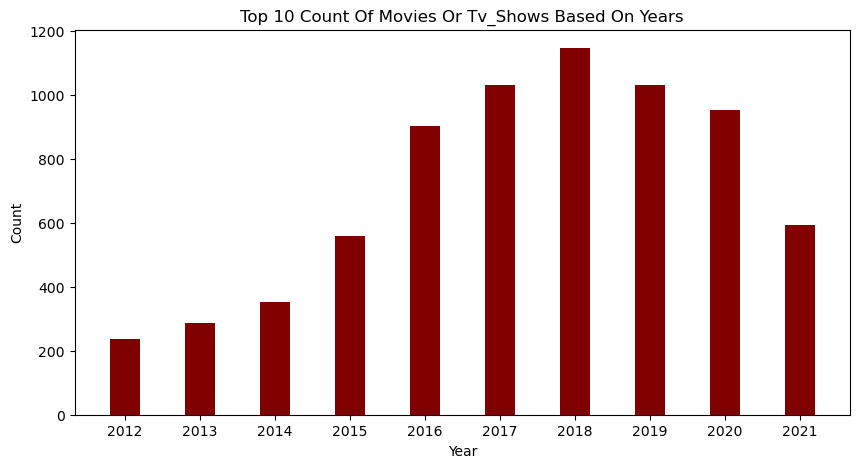

In [27]:
grouped_data=df['release_year'].dt.year.value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize = (10, 5))
plt.bar(grouped_data.index,grouped_data.values,color ='maroon',width=0.4)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(grouped_data.index)
plt.title('Top 10 Count Of Movies Or Tv_Shows Based On Years')
plt.show()

##### how many movies or tvshows

In [28]:
grouped_data=df.groupby('type')['type'].count()
grouped_data

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

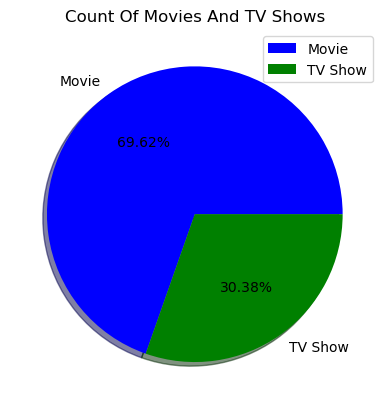

In [29]:
grouped_data=df.groupby('type')['type'].count()
mycolors = ["blue", "green"]
plt.pie(grouped_data.values,labels=grouped_data.index,autopct='%1.2f%%',shadow=True,colors=mycolors)
plt.title('Count Of Movies And TV Shows') 
plt.legend()
plt.show()

##### Top 10 Country 

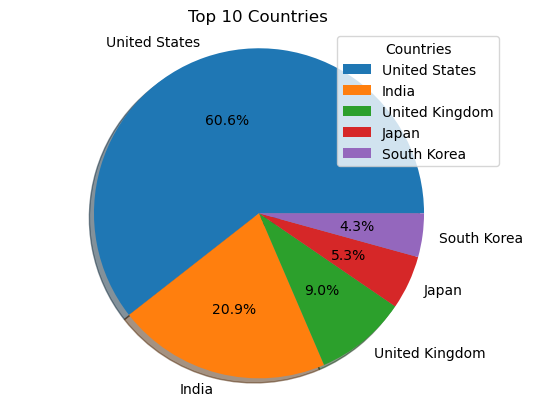

In [30]:
grouped_data = df.groupby('country')['country'].count().sort_values(ascending=False)[:5]
labels = grouped_data.index
sizes = grouped_data.values.tolist()
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
ax.legend(title="Countries", loc='best')
plt.title('Top 10 Countries')
plt.show()

#### Top 10 Country Based On Movies

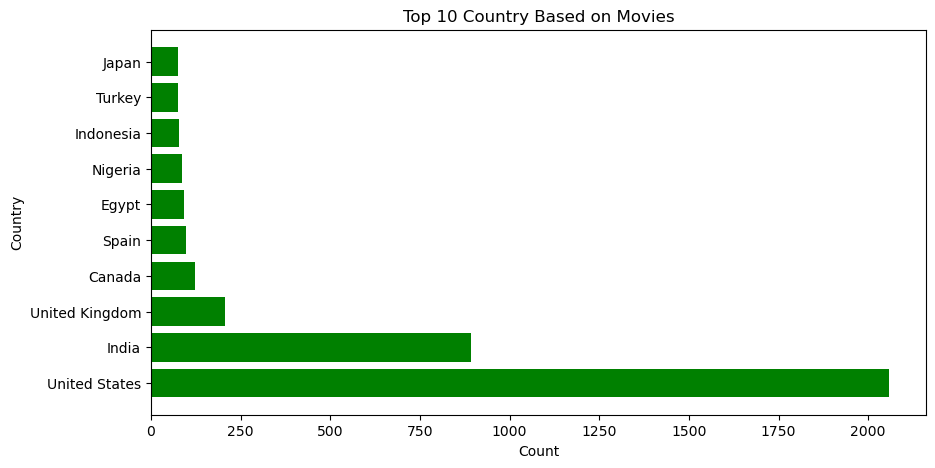

In [35]:
df_movies=df[df['type']=='Movie']
plt.figure(figsize = (10, 5))
grouped_data=df_movies.groupby('country')['country'].count().sort_values(ascending=False)[:10]
plt.barh(grouped_data.index,grouped_data.values,color='green')
plt.xlabel('Count')
plt.ylabel("Country")
plt.title("Top 10 Country Based on Movies")
plt.show()

#### Distribution Of Movie by Rating

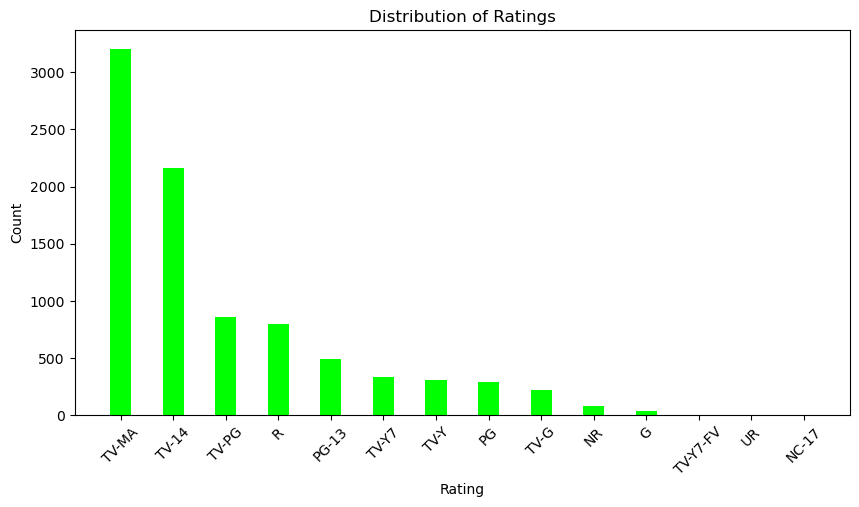

In [180]:
df_movies=df[df['type']=='Movie']
plt.figure(figsize = (10, 5))
grouped_data=df.groupby('rating')['rating'].count().sort_values(ascending=False)[:14]
plt.bar(grouped_data.index,grouped_data.values,color='lime',width=0.4)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()

#### top 10 Country Based On TV_Show

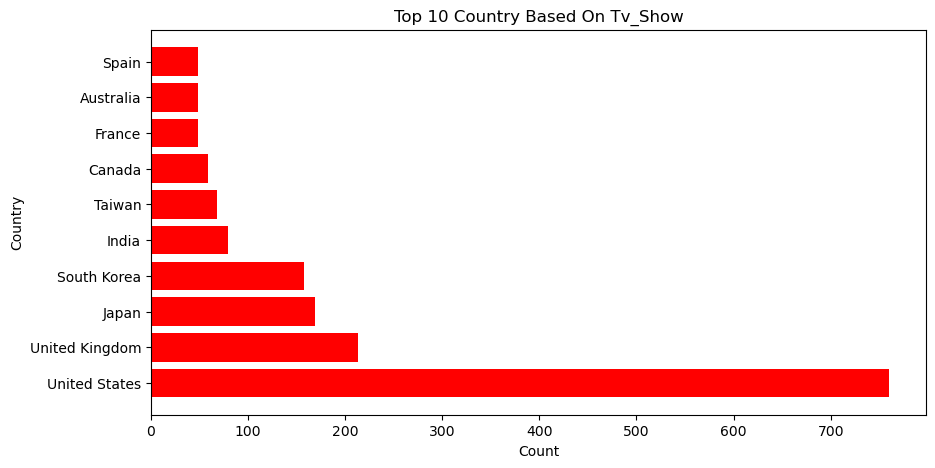

In [36]:
df_tv=df[df['type']=='TV Show']
plt.figure(figsize = (10, 5))
grouped_data=df_tv.groupby('country')['country'].count().sort_values(ascending=False)[:10]
plt.barh(grouped_data.index,grouped_data.values,color='red')
plt.xlabel('Count')
plt.ylabel("Country")
plt.title("Top 10 Country Based On Tv_Show")
plt.show()

#### Distribution Of TV_Shows by Rating

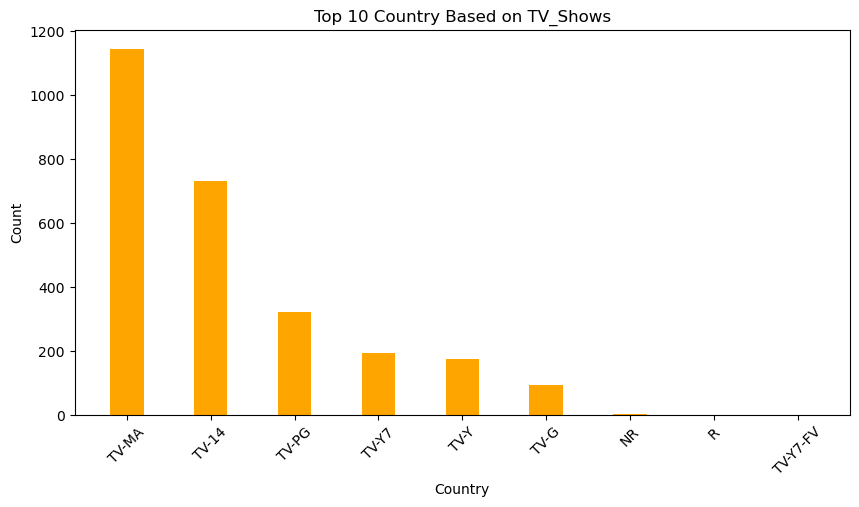

In [37]:
df_tv=df[df['type']=='TV Show']
plt.figure(figsize = (10, 5))
grouped_data=df_tv.groupby('rating')['rating'].count().sort_values(ascending=False)
plt.bar(grouped_data.index,grouped_data.values,color='orange',width=0.4)
plt.xlabel('Country')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Top 10 Country Based on TV_Shows")
plt.show()

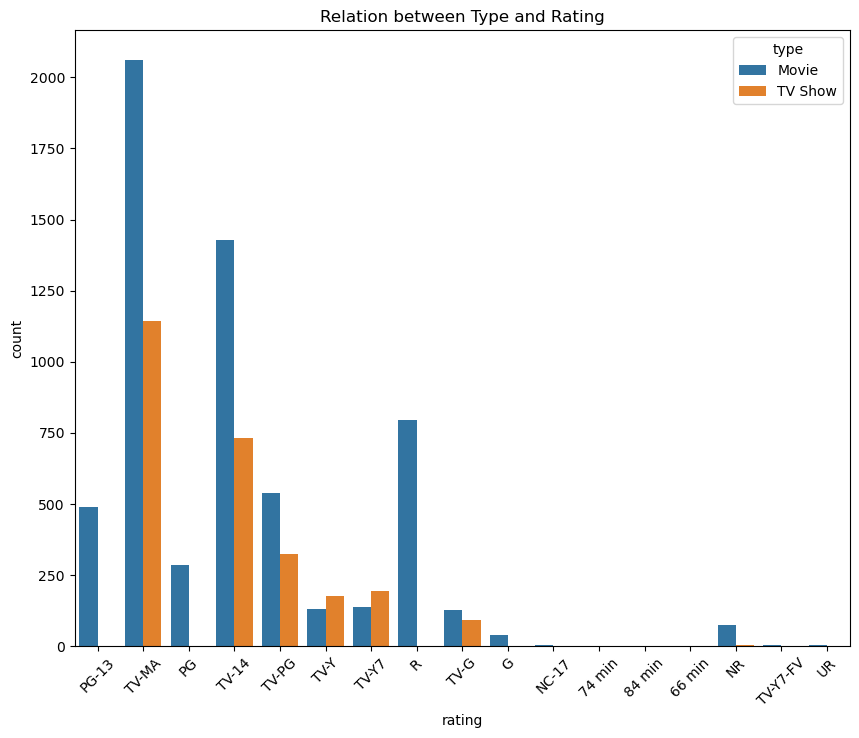

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.xticks(rotation=45)
plt.show()

#### For Top 10 Movie Country What IS The Relation Between Movie And Tv_Shows

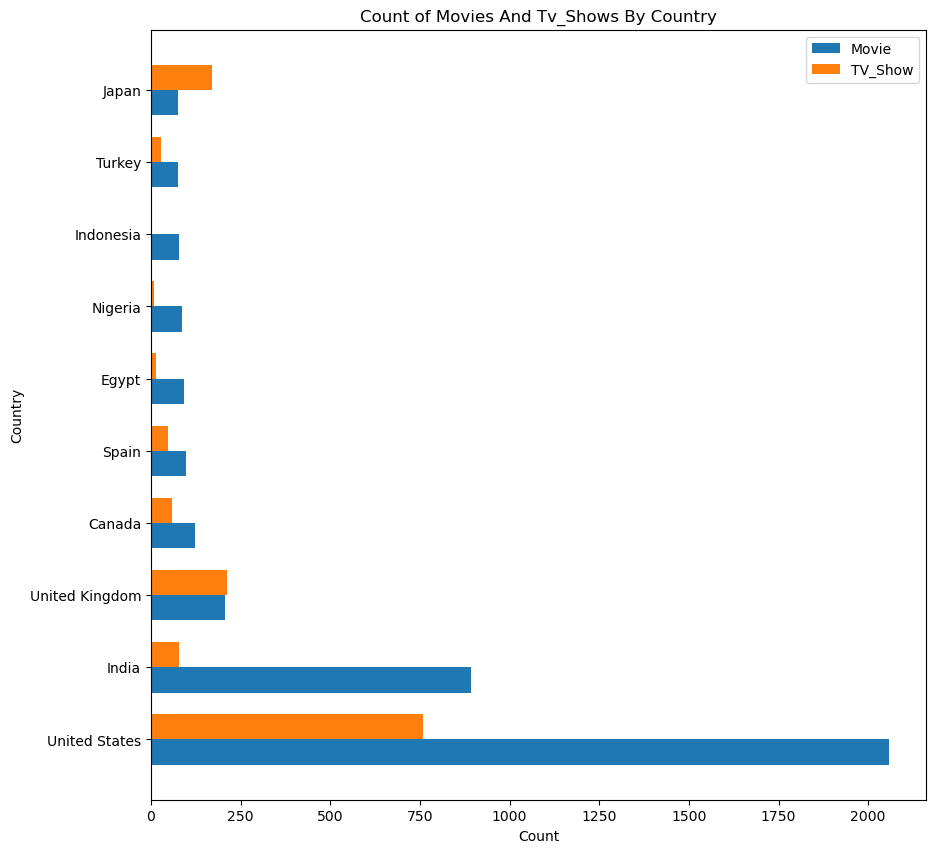

In [43]:
grouped_df = df.groupby(['country', 'type']).size().unstack().sort_values(by='Movie',ascending=False)[:10]

y_labels = grouped_df.index
y = np.arange(len(y_labels))
width = 0.35

movie_counts = grouped_df['Movie'].values
tv_counts = grouped_df['TV Show'].values

plt.figure(figsize=(10, 10))
#figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.barh(y - width/2, movie_counts, width)
plt.barh(y + width/2, tv_counts, width)

plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Count of Movies And Tv_Shows By Country")
plt.yticks(y,y_labels)
plt.legend(['Movie','TV_Show'])

plt.show()

#### Visulization For India

In [44]:
Ind=df[df['country']=='India']
Ind.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998-01-01,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,1998
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021-01-01,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",2021
50,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014-01-01,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",2014
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,"September 15, 2021",2014-01-01,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,2014


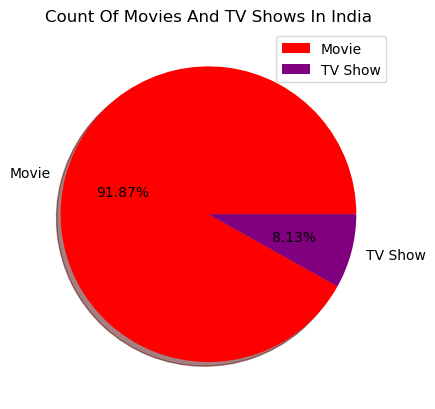

In [45]:
grouped_data=Ind.groupby('type')['type'].count()
mycolors = ["Red", "Purple"]
plt.pie(grouped_data.values,labels=grouped_data.index,autopct='%1.2f%%',shadow=True,colors=mycolors)
plt.title('Count Of Movies And TV Shows In India') 
plt.legend()
plt.show()

#### Visulization For Usa

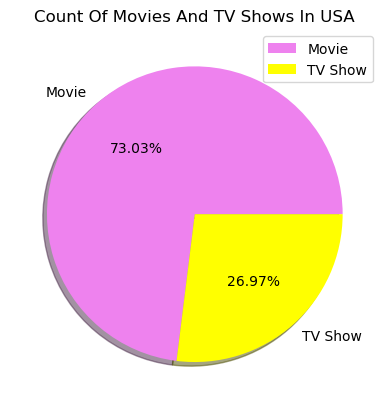

In [46]:
usa=df[df['country']=='United States']
grouped_data=usa.groupby('type')['type'].count()
mycolors = ["violet", "yellow"]
plt.pie(grouped_data.values,labels=grouped_data.index,autopct='%1.2f%%',shadow=True,colors=mycolors)
plt.title('Count Of Movies And TV Shows In USA') 
plt.legend()
plt.show()

#### Top 10 Director

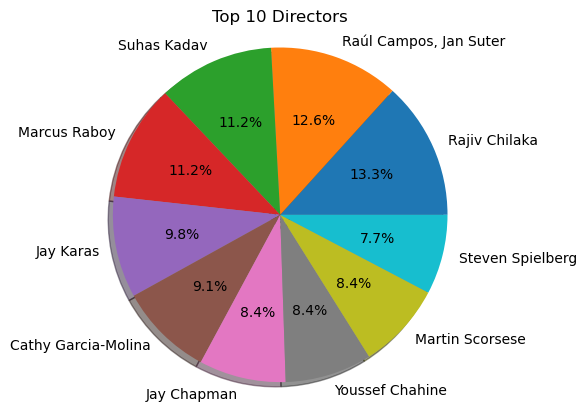

In [47]:
grouped_data=df.groupby('director')['director'].count().sort_values(ascending=False)[:10]
labels = grouped_data.index
sizes = grouped_data.values.tolist()
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
#ax.legend(title="Director", loc='best')
plt.title('Top 10 Directors')
plt.show()

#### Movies And Tv_Shows in Diff Years

In [48]:
movies=df[df['type']=='Movie']
movies.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021-01-01,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993-01-01,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1993
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021-01-01,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021-01-01,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021


In [49]:
TV_Shows=df[df['type']=='TV Show']
TV_Shows.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021-01-01,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021


In [50]:
g1=movies.groupby('year')['year'].count()
g1

year
1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    767
2018    767
2019    633
2020    517
2021    277
Name: year, Length: 73, dtype: int64

In [51]:
g2=TV_Shows.groupby('year')['year'].count()
g2

year
1925      1
1945      1
1946      1
1963      1
1967      1
1972      1
1974      1
1977      1
1979      1
1981      1
1985      1
1986      2
1988      2
1989      1
1990      3
1991      1
1992      3
1993      4
1994      2
1995      2
1996      3
1997      4
1998      4
1999      7
2000      4
2001      5
2002      7
2003     10
2004      9
2005     13
2006     14
2007     14
2008     23
2009     34
2010     40
2011     40
2012     64
2013     63
2014     88
2015    162
2016    244
2017    265
2018    380
2019    397
2020    436
2021    315
Name: year, dtype: int64

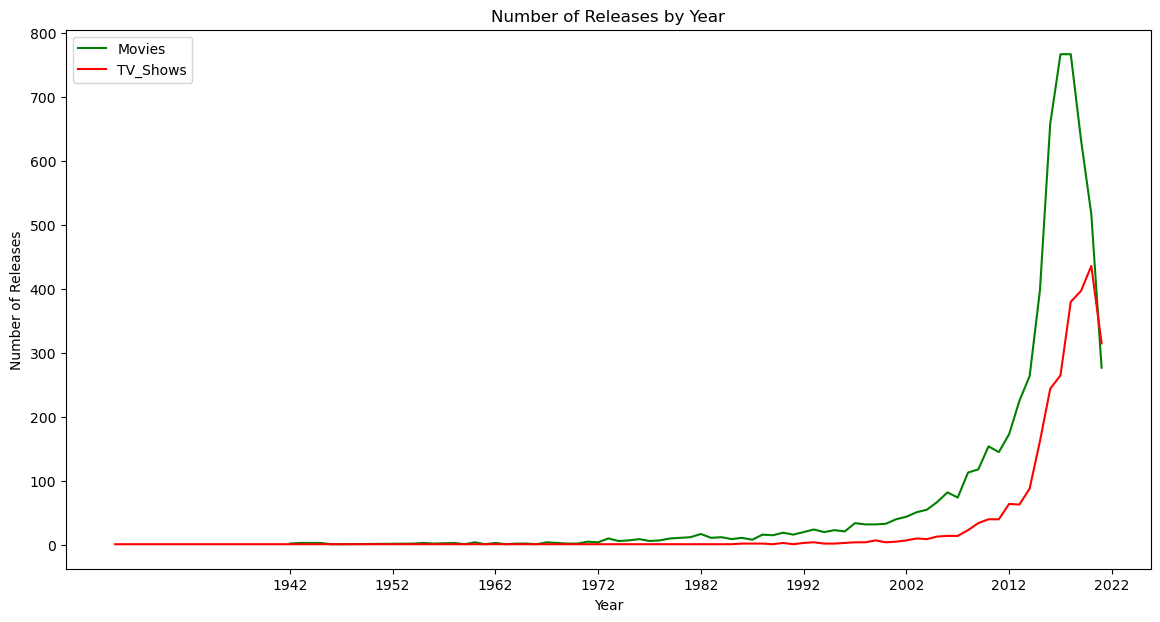

In [52]:
plt.figure(figsize=(14,7))
plt.plot(g1.index, g1.values, label='Movies',color='green')
plt.plot(g2.index, g2.values, label='TV_Shows',color='red')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Number of Releases by Year')
plt.xticks(range(min(g1.index), max(g1.index)+5, 10))
plt.legend()
plt.show()

#### Month And Year Wise Release Using Heatmap

In [70]:
newdf=df

In [71]:
newdf['date_added'] = pd.to_datetime(newdf['date_added'], format='mixed', dayfirst=True)
newdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,m,y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9.0,2021.0


In [72]:
newdf['m'] = newdf['date_added'].dt.month

In [73]:
newdf['y']=newdf['date_added'].dt.year

In [74]:
newdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,m,y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9.0,2021.0


In [75]:
newdf=newdf.dropna()

In [76]:
newdf['y']=newdf['y'].astype(int)
newdf['m']=newdf['m'].astype(int)

C:\Users\yash\AppData\Local\Temp\ipykernel_23236\2334685133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['y']=newdf['y'].astype(int)
C:\Users\yash\AppData\Local\Temp\ipykernel_23236\2334685133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['m']=newdf['m'].astype(int)


In [77]:
newdf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,m,y
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993-01-01,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1993,9,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021-01-01,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021-01-01,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021-01-01,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998-01-01,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,1998,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015-01-01,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2015,3,2016
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007-01-01,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2007,11,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009-01-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2009,11,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006-01-01,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2006,1,2020


In [63]:
"""def month(n):
    return calendar.month_abbr[n]"""

In [65]:
#newdf['m']=newdf['m'].apply(month)

C:\Users\yash\AppData\Local\Temp\ipykernel_23236\3126872508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['m']=newdf['m'].apply(month)


In [78]:
newdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,m,y
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993-01-01,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1993,9,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021-01-01,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021-01-01,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021-01-01,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998-01-01,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,1998,9,2021


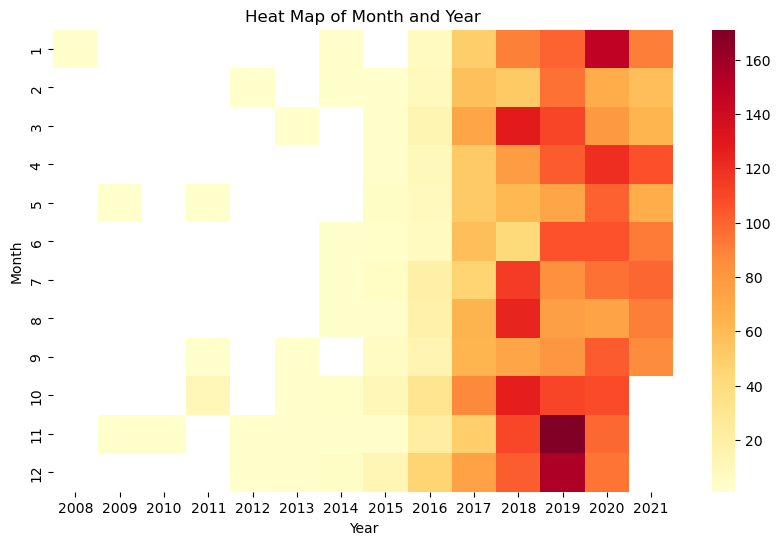

In [87]:
heatmap_data = newdf.pivot_table(index='m', columns='y', aggfunc='size')
plt.figure(figsize=(10, 6))  
sns.heatmap(heatmap_data,cmap='YlOrRd')
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Heat Map of Month and Year')
plt.show()

## Inferences

#### In this dataset we can see 70% is movie and 30% tv_show

#### In this dataset we can see when year will increase count of movie and tv_show will increase and in 2018 it was on peak after that it slowly decreased

#### In this dataset 53% movie and tv_Shows are based on USA and INDIA has 18%

#### In this dataset we clearly see INDIA has more movies than UK but In the other hand UK has more tv_shows than INDIA .UK and JAPAN has more number of tv_shows than their movies

#### In this dataset majority of movie and tv_shows are rated by TV-MA and TV-14

#### In INDIA there are 92% movies and only 8% are tv_shows

#### In this dataset 13% movies and tv_shows directed by Rajiv Chilaka which is the highest percentage for this dataset

#### Majority of Movies and tv_shows released in june to december 